In [1]:
# This code plots the differents histograms, extracts the mean, median and standard deviation and plots them
angles_05 = [20, 28, 40, 50, 60, 70, 80]
angles_10 = [20, 28, 40, 50, 60, 70, 80]


In [3]:
# run the image analysis code for all folders
import os
from fonctions import *

master_dir = "../images/" # path to folder containing folders
folder_names = [] # list of path to folders
for f in os.listdir(master_dir):
    if os.path.isdir(master_dir + f):
        folder_names.append(f)


In [ ]:

for folder in tqdm(folder_names):
    sigma_x, sigma_y, theta = folderPSF(
        master_dir + folder, path_flats=(master_dir+'/flats'))
    # save the raw data to avoid running the code againg
    loc = 'data/'  # folder to save the npy files
    with open(loc + folder + "_sigma_x.npy", "wb") as file:
        np.save(file, np.asarray(sigma_x))
    with open(loc + folder + "_sigma_y.npy", "wb") as file:
        np.save(file, np.asarray(sigma_y))
    with open(loc + folder + "_theta.npy", "wb") as file:
        np.save(file, np.asarray(theta))


fodlers: 100%|██████████| 7/7 [00:00<00:00, 70.94it/s]


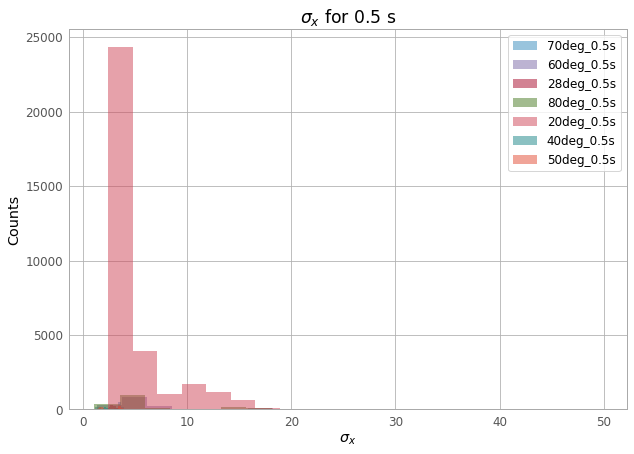

fodlers: 100%|██████████| 7/7 [00:00<00:00, 42.93it/s]


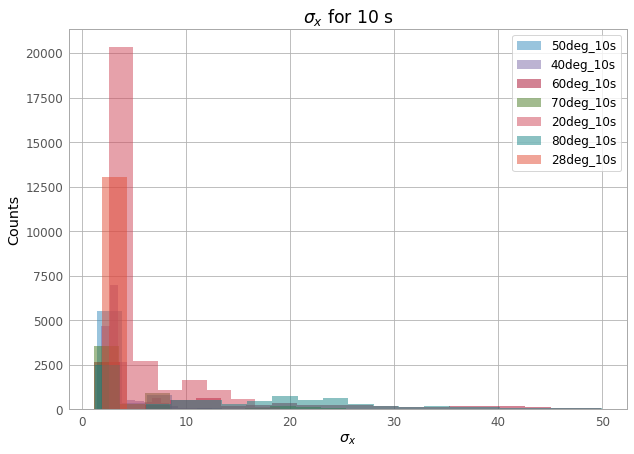

In [31]:
# sigma_x for all angles
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# get the paths to the folders
#master_dir = "../images"  # path to folder containing folders
#folder_names = []  # list of path to folders
#for f in os.listdir(master_dir):
#    if os.path.isdir(f):
#        folder_names.append(os.path.join(master_dir, f))

# for 0.5 second
mean_05 = []
med_05 = []
std_05 = []
plt.figure(figsize=(10, 7))
plt.title(r'$\sigma_x$ for $0.5$ s')
for f in tqdm([f for f in folder_names if '0.5s' in f], desc='fodlers'):
    filename = '../data/' + f + '_sigma_x.npy'
    sigma_x = np.array(np.load(filename, allow_pickle=True))
    sigma_x = [x for x in sigma_x if x > 0 and x < 50]
    mean_05.append(np.mean(sigma_x))
    med_05.append(np.median(sigma_x))
    std_05.append(np.std(sigma_x))
    plt.hist(sigma_x, bins=20, alpha=0.5, label=f)

plt.xlabel(r'$\sigma_x$')
plt.ylabel('Counts')
leg = [str(angle) + r'$^\circ$' for angle in angles_05]
plt.legend()
plt.show()

# for 10 seconds
mean_10 = []
med_10 = []
std_10 = []
plt.figure(figsize=(10, 7))
plt.title(r'$\sigma_x$ for $10$ s')
for f in tqdm([f for f in folder_names if '10s' in f], desc='fodlers'):
    filename = '../data/' + f + '_sigma_x.npy'
    sigma_x = np.array(np.load(filename, allow_pickle=True))
    sigma_x = [x for x in sigma_x if x > 0 and x < 50]
    mean_10.append(np.mean(sigma_x))
    med_10.append(np.median(sigma_x))
    std_10.append(np.std(sigma_x))
    plt.hist(sigma_x, bins=20, alpha=0.5, label=f)

plt.xlabel(r'$\sigma_x$')
plt.ylabel('Counts')
leg = [str(angle) + r'$^\circ$' for angle in angles_05]
plt.legend()
plt.show()


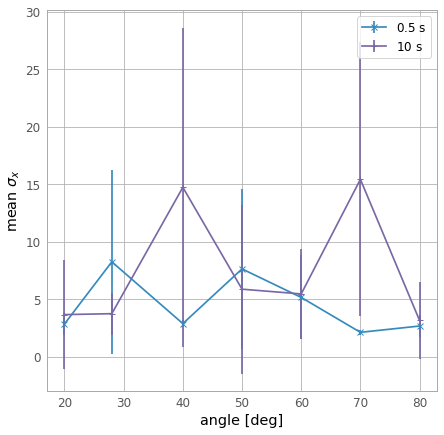

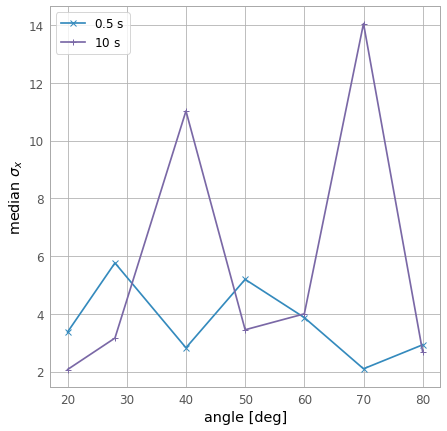

In [32]:
# the mean, median deviation for sigma_x for all angles
plt.figure(figsize=(7, 7))
plt.errorbar(angles_05, mean_05, fmt='-x', label=r'$0.5$ s', yerr=std_05)
plt.errorbar(angles_10, mean_10, fmt='-+', label=r'$10$ s', yerr=std_10)
plt.xlabel('angle [deg]')
plt.ylabel(r'mean $\sigma_x$')
plt.legend()
plt.show()

plt.figure(figsize=(7, 7))
plt.plot(angles_05, med_05, '-x', label=r'$0.5$ s')
plt.plot(angles_10, med_10, '-+', label=r'$10$ s')
plt.xlabel('angle [deg]')
plt.ylabel(r'median $\sigma_x$')
plt.legend()
plt.show()


fodlers: 100%|██████████| 7/7 [00:00<00:00, 86.89it/s]


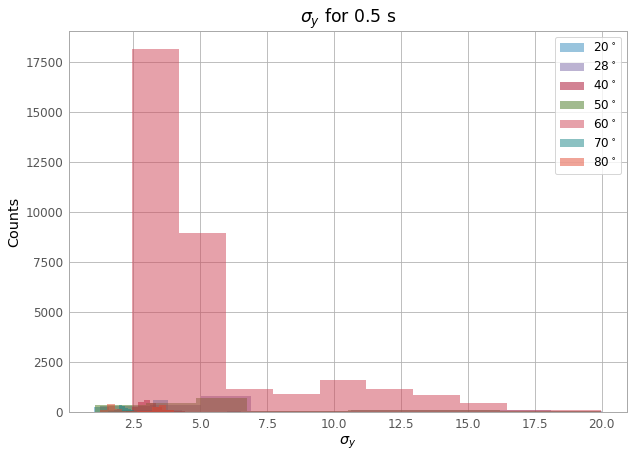

fodlers: 100%|██████████| 7/7 [00:00<00:00, 48.42it/s]


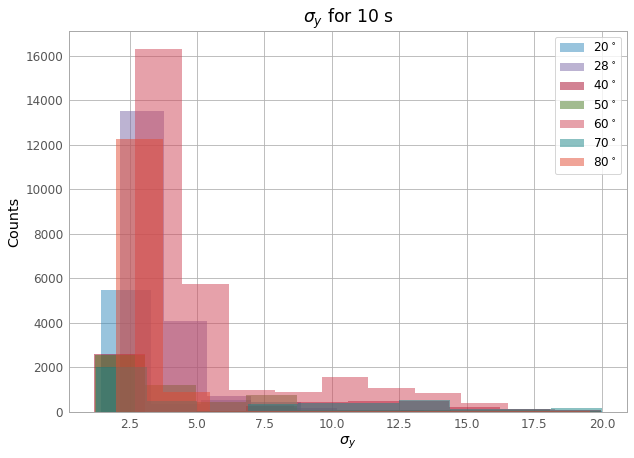

In [33]:
# sigma_y for all angles

# for 0.5 second
mean_05 = []
med_05 = []
std_05 = []
plt.figure(figsize=(10, 7))
plt.title(r'$\sigma_y$ for $0.5$ s')
for f in tqdm([f for f in folder_names if '0.5s' in f], desc='fodlers'):
    filename = '../data/' + f + '_sigma_y.npy'
    sigma_y = np.array(np.load(filename, allow_pickle=True))
    sigma_y = [x for x in sigma_y if x > 0 and x < 20]
    mean_05.append(np.mean(sigma_y))
    med_05.append(np.median(sigma_y))
    std_05.append(np.std(sigma_y))
    plt.hist(sigma_y, bins=10, alpha=0.5)

plt.xlabel(r'$\sigma_y$')
plt.ylabel('Counts')
leg = [str(angle) + r'$^\circ$' for angle in angles_05]
plt.legend(leg)
plt.show()

# for 10 seconds
mean_10 = []
med_10 = []
std_10 = []
plt.figure(figsize=(10, 7))
plt.title(r'$\sigma_y$ for $10$ s')
for f in tqdm([f for f in folder_names if '10s' in f], desc='fodlers'):
    filename = '../data/' + f + '_sigma_y.npy'
    sigma_y = np.array(np.load(filename, allow_pickle=True))
    sigma_y = [x for x in sigma_y if x > 0 and x < 20]
    mean_10.append(np.mean(sigma_y))
    med_10.append(np.median(sigma_y))
    std_10.append(np.std(sigma_y))
    plt.hist(sigma_y, bins=10, alpha=0.5)

plt.xlabel(r'$\sigma_y$')
plt.ylabel('Counts')
leg = [str(angle) + r'$^\circ$' for angle in angles_05]
plt.legend(leg)
plt.show()


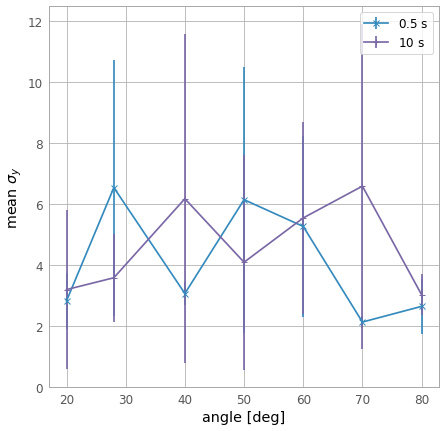

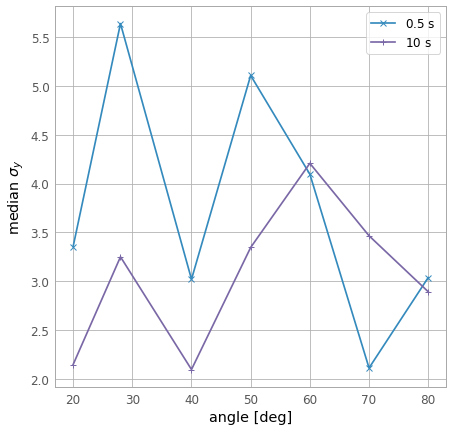

In [34]:
# the mean, median deviation for sigma_x for all angles
plt.figure(figsize=(7, 7))
plt.errorbar(angles_05, mean_05, fmt='-x', label=r'$0.5$ s', yerr=std_05)
plt.errorbar(angles_10, mean_10, fmt='-+', label=r'$10$ s', yerr=std_10)
plt.xlabel('angle [deg]')
plt.ylabel(r'mean $\sigma_y$')
plt.legend()
plt.show()

plt.figure(figsize=(7, 7))
plt.plot(angles_05, med_05, '-x', label=r'$0.5$ s')
plt.plot(angles_10, med_10, '-+', label=r'$10$ s')
plt.xlabel('angle [deg]')
plt.ylabel(r'median $\sigma_y$')
plt.legend()
plt.show()


fodlers: 100%|██████████| 7/7 [00:00<00:00, 206.41it/s]


2.8311241117749697
6.23448889830325
2.860401746722456
6.393334590043822
4.952444659007292
2.102253590849489
2.6499081868979495


fodlers: 100%|██████████| 7/7 [00:00<00:00, 89.85it/s]


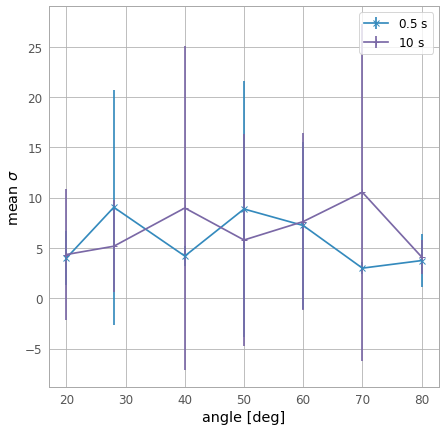

In [35]:
# sigma = sqrt(sigma_x^2 + sigma_y^2)
mean_05 = []
std_05 = []
for f in tqdm([f for f in folder_names if '0.5s' in f], desc='fodlers'):
    filename = '../data/' + f + '_'
    sigma_y = np.array(np.load(filename+'sigma_y.npy', allow_pickle=True))
    sigma_x = np.array(np.load(filename+'sigma_x.npy', allow_pickle=True))
    sigma_x = [x for x in sigma_x if x > 0 and x < 20]
    sigma_y = [x for x in sigma_y if x > 0 and x < 20]
    sigma = np.sqrt(np.mean(sigma_x)**2+np.mean(sigma_y)**2)
    mean_05.append(sigma)
    print(np.mean(sigma_x))
    std_05.append(sigma * (np.std(sigma_x)/np.mean(sigma_x) + np.std(sigma_y)/np.mean(sigma_y)))


mean_10 = []
std_10 = []
for f in tqdm([f for f in folder_names if '10s' in f], desc='fodlers'):
    filename = '../data/' + f + '_'
    sigma_y = np.array(np.load(filename+'sigma_y.npy', allow_pickle=True))
    sigma_x = np.array(np.load(filename+'sigma_x.npy', allow_pickle=True))
    sigma_x = [x for x in sigma_x if x >0 and x < 20]
    sigma_y = [x for x in sigma_y if x >0 and x < 20]
    sigma = np.sqrt(np.mean(sigma_x)**2+np.mean(sigma_y)**2)
    mean_10.append(sigma)
    std_10.append(sigma * (np.std(sigma_x)/np.mean(sigma_x) + np.std(sigma_y)/np.mean(sigma_y)))


# the mean, median and std deviation for sigma for all angles
plt.figure(figsize=(7, 7))
plt.errorbar(angles_05, mean_05, fmt='-x', label=r'$0.5$ s', yerr=std_05)
plt.errorbar(angles_10, mean_10, fmt='-+', label=r'$10$ s', yerr=std_10)
plt.xlabel('angle [deg]')
plt.ylabel(r'mean $\sigma$')
plt.legend()
plt.show()


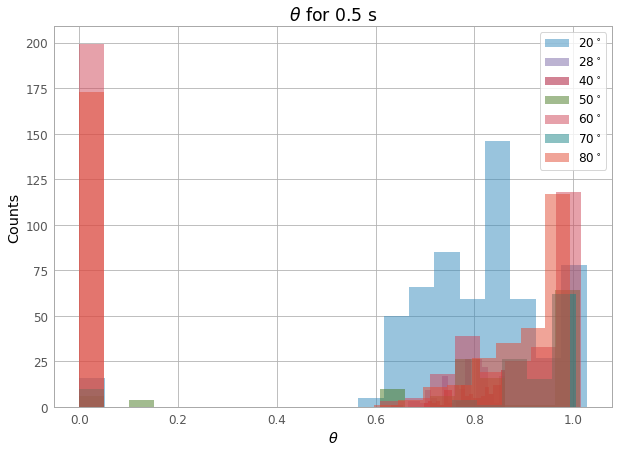

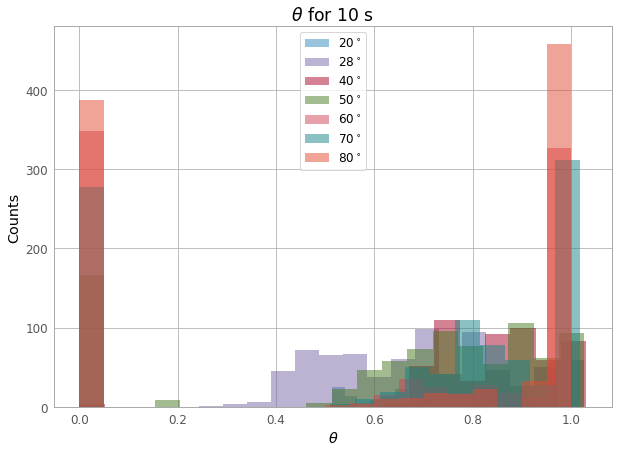

In [9]:
# theta for all angles
import matplotlib.pyplot as plt
import numpy as np

# for 0.5 second
mean_05 = []
med_05 = []
std_05 = []
plt.figure(figsize=(10, 7))
plt.title(r'$\theta$ for $0.5$ s')
for angle in angles_05:
    filename = 'data/' + str(angle) + 'deg0.5s_theta.npy'
    theta = np.array(np.load(filename, allow_pickle=True))
    mean_05.append(np.mean(theta))
    med_05.append(np.median(theta))
    std_05.append(np.std(theta))
    plt.hist(theta, bins=20, alpha=0.5)

plt.xlabel(r'$\theta$')
plt.ylabel('Counts')
leg = [str(angle) + r'$^\circ$' for angle in angles_05]
plt.legend(leg)
plt.show()

# for 10 seconds
mean_10 = []
med_10 = []
std_10 = []
plt.figure(figsize=(10, 7))
plt.title(r'$\theta$ for $10$ s')
for angle in angles_10:
    filename = 'data/' + str(angle) + 'deg10s_theta.npy'
    theta = np.array(np.load(filename, allow_pickle=True))
    mean_10.append(np.mean(theta))
    med_10.append(np.median(theta))
    std_10.append(np.std(theta))
    plt.hist(theta, bins=20, alpha=0.5)

plt.xlabel(r'$\theta$')
plt.ylabel('Counts')
leg = [str(angle) + r'$^\circ$' for angle in angles_05]
plt.legend(leg)
plt.show()


In [15]:
mean_05

[17.584288918451293,
 3441.4553024613238,
 4.194448142566026,
 4066.0348036563273,
 719.4338929098155,
 2.9908313297445646,
 8.579602499249042]

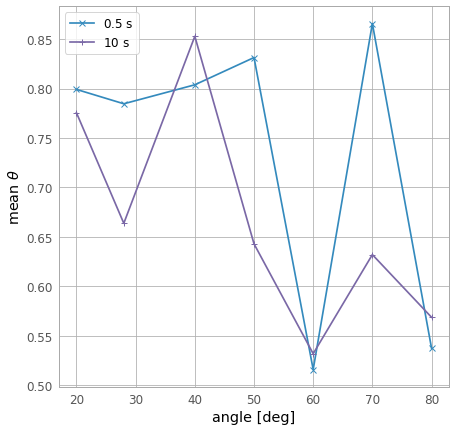

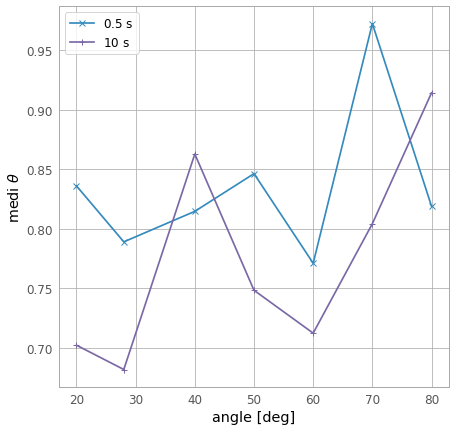

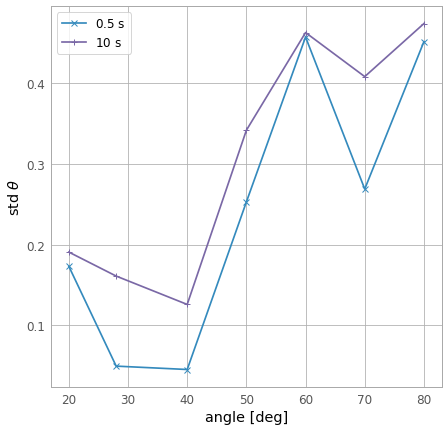

In [10]:
# the mean, median and std deviation for sigma_x for all angles
plt.figure(figsize=(7, 7))
plt.plot(angles_05, mean_05, '-x', label=r'$0.5$ s')
plt.plot(angles_10, mean_10, '-+', label=r'$10$ s')
plt.xlabel('angle [deg]')
plt.ylabel(r'mean $\theta$')
plt.legend()
plt.show()

plt.figure(figsize=(7, 7))
plt.plot(angles_05, med_05, '-x', label=r'$0.5$ s')
plt.plot(angles_10, med_10, '-+', label=r'$10$ s')
plt.xlabel('angle [deg]')
plt.ylabel(r'medi $\theta$')
plt.legend()
plt.show()

plt.figure(figsize=(7, 7))
plt.plot(angles_05, std_05, '-x', label=r'$0.5$ s')
plt.plot(angles_10, std_10, '-+', label=r'$10$ s')
plt.xlabel('angle [deg]')
plt.ylabel(r'std $\theta$')
plt.legend()
plt.show()
